In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

# 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:

# Exercise 1
iris = data("iris")


In [3]:
# 1a. print the first 3 rows
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# 1b. print the number of rows and columns (shape)
iris.shape

(150, 5)

In [5]:
# 1c. print the column names
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
# 1d. print the data type of each column
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
# 1e. print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based 
# on these statistics? Not sure!

iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
telco = pd.read_excel("Spreadsheets_Exercises.xlsx")

In [9]:
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,Unnamed: 30
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,...,0.0,1.0,3.0,2021-08-16,0.0,False,2 Year,No Phone Service,DSL,NaN
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,Two or More Lines,DSL,NaN
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,...,NaN,NaN,NaN,2021-08-16,0.0,False,1 Year,One Line,No Internet Service,NaN
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN


In [10]:
# Setup Yes/No as booleans
partner = telco.partner == "Yes"
dependents = telco.dependents == "Yes"
churn = telco.churn == "Yes"
is_senior_citizen = telco.is_senior_citizen == 1

In [11]:
# map phone_service, internet_service, and contract_type
contract_type = {
    0: "Month-to-Month",
    1: "1 Year",
    2: "2 Year"
}

phone_service = {
    0: "No Phone Service",
    1: "One line",
    2: "Two or more lines"
}

internet_service = {
    0: "No Internet Service",
    1: "DSL",
    2: "Fiber Optic"
}

telco.contract_type = telco.contract_type.map(contract_type)
telco.phone_service = telco.phone_service.map(phone_service)
telco.internet_service = telco.internet_service.map(internet_service)

In [12]:
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,Unnamed: 30
0,1371-DWPAZ,Female,0,Yes,Yes,No Phone Service,DSL,2 Year,Credit card (automatic),56.05,...,0.0,1.0,3.0,2021-08-16,0.0,False,2 Year,No Phone Service,DSL,NaN
1,2520-SGTTA,Female,0,Yes,Yes,One line,No Internet Service,2 Year,Mailed check,20.00,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN
2,2775-SEFEE,Male,0,No,Yes,Two or more lines,DSL,2 Year,Bank transfer (automatic),61.90,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,Two or More Lines,DSL,NaN
3,2923-ARZLG,Male,0,Yes,Yes,One line,No Internet Service,1 Year,Mailed check,19.70,...,NaN,NaN,NaN,2021-08-16,0.0,False,1 Year,One Line,No Internet Service,NaN
4,3115-CZMZD,Male,0,No,Yes,One line,No Internet Service,2 Year,Mailed check,20.25,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN


In [13]:
a = {"a": 1, "b": 2}
b = a
a["a"] = 23
b

{'a': 23, 'b': 2}

In [14]:
a = [1, 2, 3]
b = a
b[0] = 500
a

[500, 2, 3]

In [15]:
a = np.array([1, 2, 3])
b = a
b[0] = 450
a

array([450,   2,   3])

In [16]:
# Assign the first 100 rows
df_excel_sample = telco.loc[0:100, :].copy() # Why am I using .copy, here?
df_excel_sample.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,Unnamed: 30
0,1371-DWPAZ,Female,0,Yes,Yes,No Phone Service,DSL,2 Year,Credit card (automatic),56.05,...,0.0,1.0,3.0,2021-08-16,0.0,False,2 Year,No Phone Service,DSL,NaN
1,2520-SGTTA,Female,0,Yes,Yes,One line,No Internet Service,2 Year,Mailed check,20.00,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN
2,2775-SEFEE,Male,0,No,Yes,Two or more lines,DSL,2 Year,Bank transfer (automatic),61.90,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,Two or More Lines,DSL,NaN
3,2923-ARZLG,Male,0,Yes,Yes,One line,No Internet Service,1 Year,Mailed check,19.70,...,NaN,NaN,NaN,2021-08-16,0.0,False,1 Year,One Line,No Internet Service,NaN
4,3115-CZMZD,Male,0,No,Yes,One line,No Internet Service,2 Year,Mailed check,20.25,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN


In [17]:
# print the number of rows in the dataframe
telco.shape[0]

7043

In [18]:
# print the first 5 column names
telco.columns[0:5] # or telco.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [19]:
# Print the column names that have a data type of object.¶
# df_excel_sample.select_dtypes(include='object').head()
telco.select_dtypes(include='object').columns.tolist()

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'internet_service',
 'contract_type',
 'payment_type',
 'churn',
 'contract_type_desc',
 'phone_type_desc',
 'internet_type_desc']

In [20]:
# compute the range for each of the numeric variables.
numerics = telco.select_dtypes(include=['float64', 'int64'])

In [21]:
print("Range from min-max of numeric values")
numerics.max() - numerics.min()

Range from min-max of numeric values


is_senior_citizen                 1.000000
monthly_charges                 100.500000
total_charges                  8666.000000
tenure                           79.341772
partner_dependents                3.000000
no_partners_no_dependents         0.000000
no_dependents_yes_partners        0.000000
dependents_no_partners            0.000000
yes_dependents_and_partners       0.000000
Unnamed: 23                       0.000000
average_monthly_charges         118.750000
Unnamed: 30                            NaN
dtype: float64

In [22]:
# Read in a google sheet, being sure to update the query string to export?format=csv
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(url)

# Print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
# How many rows and columns?
df_google.shape

(891, 12)

In [24]:
# Output the column names
df_google.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [25]:
# output the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
# print the summary statistics for each of the numeric variables
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [27]:
# print the unique values for each of your categorical variables
for column in df_google.select_dtypes(include='object').columns:
    print(f"Values in the {column} column:")
    print(df_google[column].value_counts())
    print("------")
    print()

Values in the Name column:
Nirva, Mr. Iisakki Antino Aijo                   1
Romaine, Mr. Charles Hallace ("Mr C Rolmane")    1
Marechal, Mr. Pierre                             1
Sawyer, Mr. Frederick Charles                    1
Dahlberg, Miss. Gerda Ulrika                     1
                                                ..
Rekic, Mr. Tido                                  1
Culumovic, Mr. Jeso                              1
Rush, Mr. Alfred George John                     1
Greenberg, Mr. Samuel                            1
Troupiansky, Mr. Moses Aaron                     1
Name: Name, Length: 891, dtype: int64
------

Values in the Sex column:
male      577
female    314
Name: Sex, dtype: int64
------

Values in the Ticket column:
347082             7
CA. 2343           7
1601               7
CA 2144            6
347088             6
                  ..
SOTON/OQ 392089    1
3101277            1
SC/PARIS 2146      1
367231             1
C 4001             1
Name: Ticket, Length

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire

# Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [29]:
df = acquire.new_iris_data()

In [30]:
df.head(5)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### 2. Drop the species_id and measurement_id columns.

In [31]:
df = df.drop(columns=['species_id'])

In [32]:
df.head(5)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 3. Rename the species_name column to just species. 

In [33]:
df = df.rename(columns={'species_name':'species'})
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 4. Create dummy variables of the species name.

In [34]:
# create dummies using .get_dummies(column_name,not dropping any of the dummy columns)
dummy_df = pd.get_dummies(df['species'], drop_first=False)
dummy_df.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [35]:
# join original df with dummies df using .concat([original_df,dummy_df], join along the index)
df = pd.concat([df, dummy_df], axis=1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [36]:
# get back original data
df = acquire.new_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


# 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [37]:
def prep_iris(df):
    '''Prepares acquired Iris data for exploration'''
    
    # drop column using .drop(columns=column_name)
    df = df.drop(columns='species_id')
    
    # remame column using .rename(columns={current_column_name : replacement_column_name})
    df = df.rename(columns={'species_name':'species'})
    
    # create dummies dataframe using .get_dummies(column_name,not dropping any of the dummy columns)
    dummy_df = pd.get_dummies(df['species'], drop_first=False)
    
    # join original df with dummies df using .concat([original_df,dummy_df], join along the index)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [38]:
prep_iris(df).head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [39]:
# get back original data
df = acquire.new_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above: August 17-2021

Acquire, prepare & split your data. 

In [40]:
# Acquire data
df = acquire.new_iris_data()

In [41]:
# adding function definition for function to split data into train/validate/test

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on 
    species.
    return train, validate, test DataFrames.
    '''
    
    # splits df into train_validate and test using train_test_split() stratifying on 
    # species to get an even mix of each species
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.species)
    
    # splits train_validate into train and validate using train_test_split() stratifying 
    # on species to get an even mix of each species
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.species)
    return train, validate, test

In [42]:
# adding function split_data to prep_iris function

def prep_iris_with_split(df):
    '''Prepares acquired Iris data for exploration'''
    
    # drop column using .drop(columns=column_name)
    df = df.drop(columns='species_id')
    
    # remame column using .rename(columns={current_column_name : replacement_column_name})
    df = df.rename(columns={'species_name':'species'})
    
    # create dummies dataframe using .get_dummies(column_name,not dropping any of the dummy columns)
    dummy_df = pd.get_dummies(df['species'], drop_first=False)
    
    # join original df with dummies df using .concat([original_df,dummy_df], join along the index)
    df = pd.concat([df, dummy_df], axis=1)
    
    # split data into train/validate/test using split_data function
    train, validate, test = split_data(df)
    
    return train, validate, test

In [43]:
# unpacking train, validate, test from prep_iris_with_split function
train, validate, test = prep_iris_with_split(df)

In [44]:
print(f'train:{train.shape} validate:{validate.shape} test:{test.shape}')

train:(84, 8) validate:(36, 8) test:(30, 8)


# Importing Prepared Data

In [45]:
import prepare as p
import explore

# getting original acquire data using get_iris_data imported from aquire file
df = acquire.new_iris_data()

# preparing data using prep_iris imported form prepare 
df = p.prep_iris(df)

df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


# Importing Prepared Data With Split

In [46]:
# getting original acquire data using get_iris_data imported from aquire file
df = acquire.new_iris_data()

# preparing data using prep_iris_with_split imported form prepare 
train, validate, test = p.prep_iris_with_split(df)

In [47]:
print(f'train:{train.shape} validate:{validate.shape} test:{test.shape}')

train:(84, 8) validate:(36, 8) test:(30, 8)


In [48]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


In [49]:
test.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
80,versicolor,5.5,2.4,3.8,1.1,0,1,0
45,setosa,4.8,3.0,1.4,0.3,1,0,0
144,virginica,6.7,3.3,5.7,2.5,0,0,1
110,virginica,6.5,3.2,5.1,2.0,0,0,1
38,setosa,4.4,3.0,1.3,0.2,1,0,0


# 2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [50]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

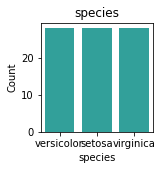

               species  Count  Percent
virginica   versicolor     28    33.33
versicolor      setosa     28    33.33
setosa       virginica     28    33.33
_________________________________________________________________


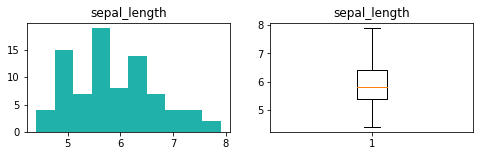

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


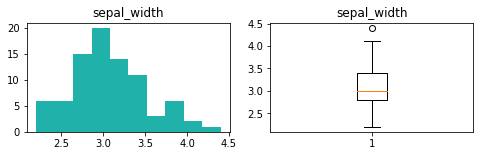

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


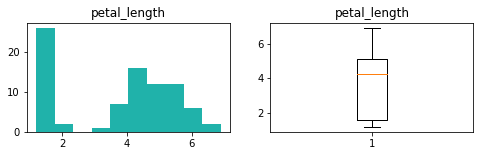

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


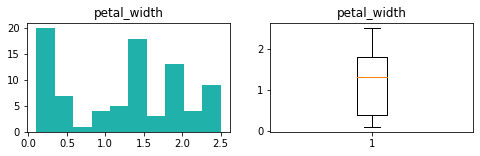

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [51]:
explore.explore_univariate(train, cat_vars, quant_vars)

In [52]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [53]:
#For each species (categorical variable): create a frequency table and a bar plot 
    # of those frequencies.
    
train.value_counts().head()

species     sepal_length  sepal_width  petal_length  petal_width  setosa  versicolor  virginica
setosa      4.4           2.9          1.4           0.2          1       0           0            1
versicolor  6.5           2.8          4.6           1.5          0       1           0            1
virginica   6.3           2.7          4.9           1.8          0       0           1            1
            6.2           2.8          4.8           1.8          0       0           1            1
            6.0           2.2          5.0           1.5          0       0           1            1
dtype: int64

In [54]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
sepal_length,1.000000,-0.154904,0.867976,0.824691,-0.722317,0.024224,0.698093
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.623439,-0.442075,-0.181364
petal_length,0.867976,-0.476228,1.000000,0.957345,-0.928394,0.205008,0.723386
petal_width,0.824691,-0.403306,0.957345,1.000000,-0.877707,0.104650,0.773058
setosa,-0.722317,0.623439,-0.928394,-0.877707,1.000000,-0.500000,-0.500000
versicolor,0.024224,-0.442075,0.205008,0.104650,-0.500000,1.000000,-0.500000
virginica,0.698093,-0.181364,0.723386,0.773058,-0.500000,-0.500000,1.000000


<AxesSubplot:xlabel='species'>

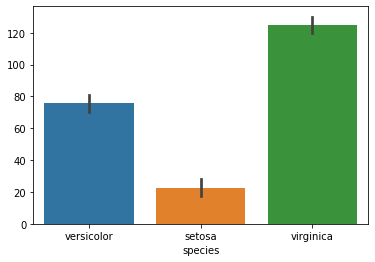

In [55]:
sns.barplot(x=train.species, y=train.index)

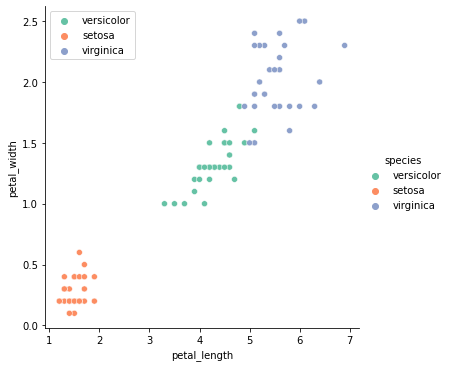

In [57]:
sns.relplot(x='petal_length', y='petal_width', data=train, hue='species', palette='Set2')
plt.legend()
plt.show()